In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

import os

# SPCA libraries
from SPCA import helpers, make_plots
import sys
%matplotlib inline

In [2]:
rootpath = '/home/ldang05/projects/def-ncowan/ldang05/Spitzer_Data/'
planet = 'WASP-76b'
channel = 'ch2'

/home/ldang05/projects/def-ncowan/ldang05/Spitzer_Data/WASP-76b/analysis/aorSnippet.txt


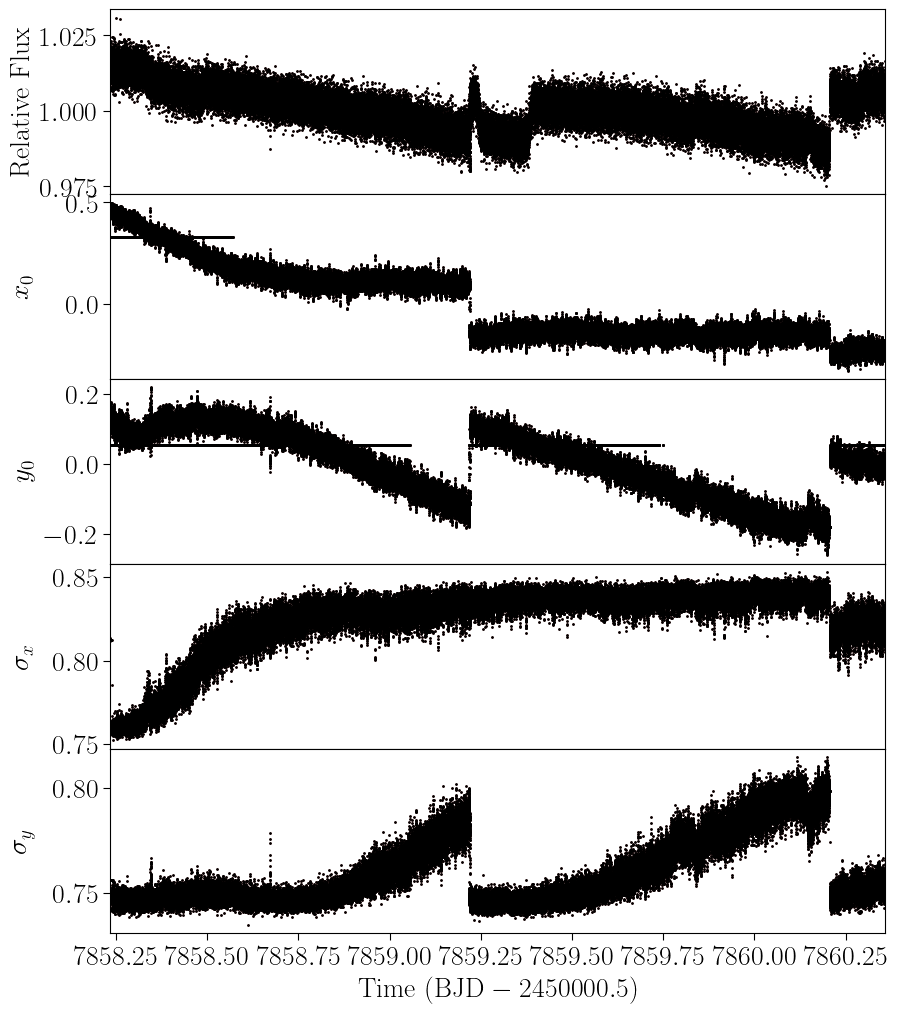

In [3]:
AOR_snip = ''
print(rootpath+planet+'/analysis/aorSnippet.txt')

with open(rootpath+planet+'/analysis/aorSnippet.txt') as f:
    AOR_snip = f.readline().strip()[1:]

mainpath   = rootpath+planet+'/analysis/'+channel+'/'
phoption = ''
ignoreFrames = np.array([])
rms = None
with open(mainpath+'bestPhOption.txt') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        if phoption=='' and lines[i][0]=='/':
            foldername = rootpath+lines[i][lines[i].find(planet):].strip()+'/'
            phoption = lines[i].split('/')[-1].strip()
            i += 1
            ignoreFrames = np.array(lines[i].strip().split('=')[1].strip().replace(' ','').split(','))
            if np.all(ignoreFrames==['']):
                ignoreFrames = np.array([]).astype(int)
            else:
                ignoreFrames = ignoreFrames.astype(int)
            i += 1
            rms = float(lines[i])
        elif phoption!='' and lines[i][0]=='/':
            if float(lines[i+2]) < rms:
                foldername = rootpath+lines[i][lines[i].find(planet):].strip()+'/'
                phoption = lines[i].split('/')[-1].strip()
                i += 1
                ignoreFrames = np.array(lines[i].split('=')[1].strip().replace(' ','').split(','))
                if np.all(ignoreFrames==['']):
                    ignoreFrames = np.array([]).astype(int)
                else:
                    ignoreFrames = ignoreFrames.astype(int)
                i += 1
                rms = float(lines[i])
            else:
                i += 3

# Figure out where there are AOR breaks
breakpath = rootpath+planet+'/analysis/'+channel+'/aorBreaks.txt'
with open(breakpath, 'r') as file:
    breaks = file.readline().strip()
    if len(breaks)==0:
        breaks = np.array([])
    else:
        breaks = np.array(breaks.split(' ')).astype(float)

filename   = channel + '_datacube_binned_AORs'+AOR_snip+'.dat'
if os.path.exists(filename):
    flux, time, xdata, ydata, psfxw, psfyw = helpers.get_data(foldername, filename, 'Poly2_v1')
else:
    filename   = channel + '_datacube_full_AORs'+AOR_snip+'.dat'
    flux, time, xdata, ydata, psfxw, psfyw = helpers.get_full_data(foldername, filename, 'Poly2_v1')

# Make the plots
make_plots.plot_photometry(time, flux, xdata, ydata, psfxw, psfyw, 
                           time, flux, xdata, ydata, psfxw, psfyw, breaks, showPlot=True)

response = input('Would you like to cut the first AOR (y/n)? ')

if response=='y':
    cutFirstAOR = True
else:
    cutFirstAOR = False

with open(rootpath+planet+'/analysis/'+channel+'/cutFirstAOR.txt', 'w') as f:
    f.write(str(cutFirstAOR))